### Processing Venkat's Learned Matrices
This is a notebook that processes the .mat files that Venkat outputs for the learned adjacency matrices. It will process them into the desired networkx structure and save by pickle.

In [1]:
import scipy.io
import numpy as np
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import from_networkx

Change the desired .mat file as needed.

In [2]:
file = scipy.io.loadmat('venkat_mat/A_289_fullconnected_initialization.mat')

In [3]:
adj_mat = file['A1']

In [4]:
G = nx.from_numpy_matrix(adj_mat)

In [5]:
pos = []
nx.set_node_attributes(G, pos, 'pos')

I have saved the PMT positions in the top array to a pickle file. The other way to get these positions would be to process the output of *straxen.common.pmt_positions(xenon1T=True)*.

In [6]:
with open('pmt_top_positions.pkl', 'rb') as fn:
    top_pos = pkl.load(fn)

Giving each node their associated position.

In [7]:
for i in range(127):
    G.nodes[i]['pos'] = top_pos[i,:]

Here is the plot of what the adjacency matrix looks like, just to make sure that this matches Venkat's images.

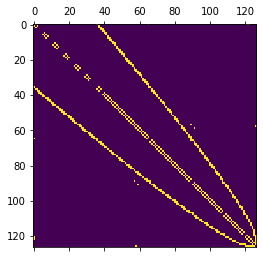

In [8]:
plt.matshow(adj_mat)

Here is another check that the output will be correct when taken in by PyTorch. There should be twice the total number of edges in *edge_index* and 127 positions in *pos*. The *weight* is not being used so far. (The reason for twice the total number of edges is because PyTorch uses directed graphs. It needs to add in both directions when an edge is undirected.)

In [9]:
TG = from_networkx(G)

In [10]:
TG

Data(edge_index=[2, 578], pos=[127, 2], weight=[578])

In [11]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126))

Saving the processed file in a location that is easily accessible by the GCNN notebook.

In [12]:
with open('learning_data/raw/learned_graph_1T_A-289-Full-Init.pkl', 'wb') as fn:
    pkl.dump(G, fn)

Although this does not make use of the ordered graph as previously mentioned as needed, I've tested this processing on a few simple graphs and found that doing it this way does preserve the correct order for PyTorch. It seems that the way I had done it for the Delaunay graph is the one that needs the ordered graph.